# 1.数据操作

1.1 张量创建

In [2]:
# 导入torch
import torch       #-----深度学习pytorch框架
import numpy as np #-----Python数据分析大杀器之Numpy

In [4]:
'''
tensor(张量)表示一个数值组成的数组，可以有多个维度，
类似numpy中的n维数组,因此很多n维数组有的方法张量也有，
下面我们来测试一下有哪些numpy中的方法可以在这里使用。
'''
x = torch.arange(12)
y = np.arange(12)

x,y

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [5]:
# 查看形状
x.shape

torch.Size([12])

In [6]:
# 查看数量长度
len(x)

12

In [7]:
x = x.reshape(3,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [8]:
x = torch.zeros(3,4)
x

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [9]:
x = torch.ones(3,4)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [10]:
#对角阵
l = torch.eye(5)
l

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [11]:
#ones_like创建形状一致的全为1的元素矩阵
x = torch.ones_like(l)
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [13]:
#randn创建随机矩阵
x =  torch.randn((2,4))
x

tensor([[-0.9518, -1.0551,  0.4053, -1.6305],
        [-0.8329, -0.3188,  0.4203,  1.2616]])

In [14]:
x = torch.tensor([ [1,1,1,1],
                   [1,2,3,4],
                   [4,3,2,1]  ])
x 

tensor([[1, 1, 1, 1],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [24]:
x1 = x.numpy()
type(x),type(x1)

(torch.Tensor, numpy.ndarray)

1.2 基本运算

In [110]:
x = torch.tensor([1,2,3,4])
y = torch.tensor([2,3,4,5])
x+y , x-y , x*y , x/y , torch.exp(x)

(tensor([3, 5, 7, 9]),
 tensor([-1, -1, -1, -1]),
 tensor([ 2,  6, 12, 20]),
 tensor([0.5000, 0.6667, 0.7500, 0.8000]),
 tensor([ 2.7183,  7.3891, 20.0855, 54.5981]))

In [26]:
#torch
x = torch.arange(12).reshape(3,4)
x.sum(dim=0)#按行求和

tensor([12, 15, 18, 21])

In [27]:
#numpy
y = np.arange(12).reshape((3,4))
y.sum(axis=0)#按行求和

array([12, 15, 18, 21])

从上面可以看出，tensor和array都可以按行或案列进行操作，但是在torch中，指定dim参数，numpy中，指定axis参数

1.3 广播机制
---
我们之前的numpy中介绍过广播机制，在两个数组纬度不同时，可以适当的复制元素来拓展一个纬度或者两个纬度的元素，我们接下来看看torch中是不是也支持广播机制

In [28]:
x = torch.tensor([[1,2,3],
                  [4,5,6]])
y = torch.tensor([1,1,1])
z = x + y
print('x:',x)
print('y:',y)
print('z:',z)


x: tensor([[1, 2, 3],
        [4, 5, 6]])
y: tensor([1, 1, 1])
z: tensor([[2, 3, 4],
        [5, 6, 7]])


#  1.4 索引和切片

In [29]:
x = torch.tensor([[1,2,3],
                  [4,5,6]])

In [30]:
# 选取第一列和第二列的数据
x[:,[0,1]]

tensor([[1, 2],
        [4, 5]])

# 2.自动微分（求导）
在深度学习中，对于很多层的神经网络而言，人工求导是一件很复杂的事情，因此在如何自动求导是一件很work的事情

这里我们假设要对
y=(x^T)*x
进行求导。首先我们先初始化一个x值

In [40]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

下面我们在计算梯度之前，需要一个地方来存储梯度，就像我们在进行一些循环时，需要一个空列表来存储内容。下面我们来看如何使用requires_grad_来存储

In [41]:
x.requires_grad_(True)
print(x.grad)     #默认是None，相当于这个时候是一个空列表

None


In [42]:
#下面我们来计算y
# y = x * x
y = torch.dot(x,x) #实质上是 x.T  *  x
y

tensor(14., grad_fn=<DotBackward0>)

In [43]:
# 通过反向传播函数计算梯度
y.backward(retain_graph=False)
x.grad

tensor([0., 2., 4., 6.])

这里默认情况下，pytorch会保存梯度，因此当我们需要重新计算梯度时，首先要进行初始化,使用grad.zero_

In [44]:
x.grad.zero_() #梯度清零
# 重新计算 y=x 的梯度
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

上面我们都是先将y变为一个标量再求梯度，如果y不是标量呢？可以先将y求和转换为标量

In [45]:
x.grad.zero_()
y = x*x
print(y)
y.sum().backward()
x.grad

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.])

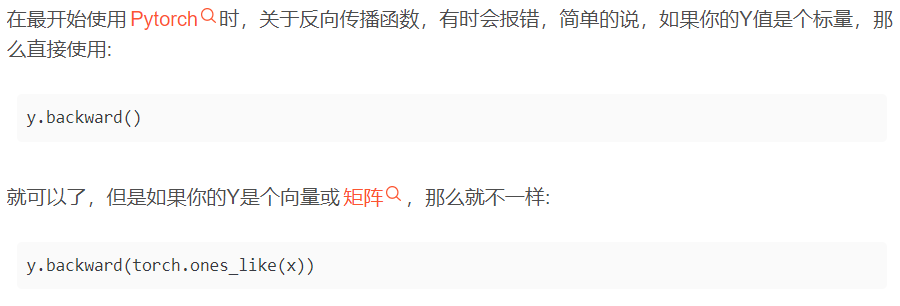

# 2.3 分离微分计算

这里沐神给出了一个这样的场景，y是关于x的函数，而z是关于y和x的函数，在我们对z求x偏导时，我们希望将y看做一个常数。这种方法在有的复杂的神经网络模型会很有效，具体通过detach()实现，将u为y的常量
..
即 z = f(y,x)= y * x  , y = f(x)=x * x

In [49]:
#z = f(y,x)= y * x  , y = f(x)=x * x
print("x:  ",x)
x.grad.zero_()#初始化梯度
y = x * x#y对x的函数
u = y.detach()#将y分离处理
z = u * x#z对x的函数
print("y:  ",z)
z.sum().backward()#通过反向传播函数求梯度
x.grad

x:   tensor([0., 1., 2., 3.], requires_grad=True)
y:   tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)


tensor([0., 1., 4., 9.])

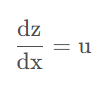

In [50]:
u

tensor([0., 1., 4., 9.])

# 2.4 控制流梯度计算

使用自动微分有一个好处是，当我们的函数是分段的，其也会自动计算得到相应的梯度。下面我们来看一个线性控制流梯度计算案例：

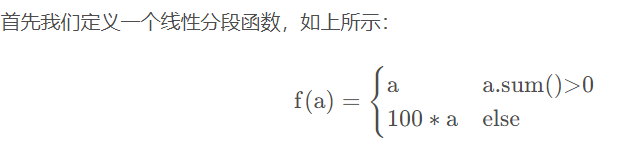

In [98]:
def f(a):
    if a.sum() > 0:
        b = a
    else:
        b = 100 * a
    return b

In [99]:
a = torch.randn(12, requires_grad=True)
d = f(a)
d.backward(torch.ones_like(a))
a.grad == d / a

tensor([True, True, True, True, True, True, True, True, True, True, True, True])

# 练习与总结
练习与总结
练习与总结
练习与总结
练习与总结
练习与总结
# 练习与总结

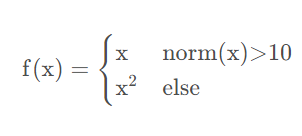

# norm(x)如果x是一个向量，那么norm(x)就等于x的模长。
称为范数

In [105]:
def f(x):
    if x.norm() > 10:
        y = x
    else:
        y = x*x
    return y

x = torch.randn(12,requires_grad=True)
print(x)
print(x.norm())
d = f(x)
d.backward(torch.ones_like(x))
x.grad

tensor([-0.1411, -1.0098, -0.1890,  0.2472, -0.6672, -0.3723, -1.2092, -0.0230,
        -0.2149,  1.5529, -1.4834,  0.5899], requires_grad=True)
tensor(2.8617, grad_fn=<CopyBackwards>)


tensor([-0.2822, -2.0196, -0.3780,  0.4944, -1.3344, -0.7446, -2.4185, -0.0460,
        -0.4299,  3.1058, -2.9668,  1.1798])

# 数据预处理

In [3]:
import numpy as np
import pandas as pd
import torch
from numpy import nan as NaN

In [5]:
data = pd.read_csv("house_tiny.csv")  
# 可以看到原始表格中的空值NA被识别成了NaN
print('1.原始数据:\n', data)

1.原始数据:
    NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [6]:
inputs, outputs = data.iloc[:, 0: 2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())  # 用均值填充NaN
print(inputs)
print("-"*40)
print(outputs)
print("-"*40)
# 利用pandas中的get_dummies函数来处理离散值或者类别值。
# [对于 inputs 中的类别值或离散值，我们将 “NaN” 视为一个类别。] 
#由于 “Alley”列只接受两种类型的类别值 “Pave” 和 “NaN”
inputs = pd.get_dummies(inputs, dummy_na=True)
print('2.利用pandas中的get_dummies函数处理:\n', inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
----------------------------------------
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64
----------------------------------------
2.利用pandas中的get_dummies函数处理:
    NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [7]:
x, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
print('3.转换为张量：')
print(x)
print(y)

3.转换为张量：
tensor([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=torch.float64)
tensor([127500, 106000, 178100, 140000])


In [8]:
# 扩展填充函数fillna的用法
df1 = pd.DataFrame([[1, 2, 3], [NaN, NaN, 2], [NaN, NaN, NaN], [8, 8, NaN]])  # 创建初始数据
print('4.函数fillna的用法：')
print(df1)
print("-"*40)
print(df1.fillna(100))  # 用常数填充 ，默认不会修改原对象
print("-"*40)
print(df1.fillna({0: 10, 1: 20, 2: 30}))  # 通过字典填充不同的常数，默认不会修改原对象
print("-"*40)
print(df1.fillna(method='ffill'))  # 用前面的值来填充
# inplace= True直接修改原对象
# print(df1.fillna(0, inplace=True))  

4.函数fillna的用法：
     0    1    2
0  1.0  2.0  3.0
1  NaN  NaN  2.0
2  NaN  NaN  NaN
3  8.0  8.0  NaN
----------------------------------------
       0      1      2
0    1.0    2.0    3.0
1  100.0  100.0    2.0
2  100.0  100.0  100.0
3    8.0    8.0  100.0
----------------------------------------
      0     1     2
0   1.0   2.0   3.0
1  10.0  20.0   2.0
2  10.0  20.0  30.0
3   8.0   8.0  30.0
----------------------------------------
     0    1    2
0  1.0  2.0  3.0
1  1.0  2.0  2.0
2  1.0  2.0  2.0
3  8.0  8.0  2.0


In [9]:
df2 = pd.DataFrame(np.random.randint(0, 10, (5, 5)))  # 随机创建一个5*5
df2.iloc[1:4, 3] = NaN
df2.iloc[2:4, 4] = NaN  # 指定的索引处插入值
print(df2)
print("-"*40)
print(df2.fillna(method='bfill', limit=2))  # 限制填充个数
print("-"*40)
print(df2.fillna(method="ffill", limit=1, axis=1)) 
print("-"*40)

   0  1  2    3    4
0  3  0  6  7.0  5.0
1  6  9  9  NaN  8.0
2  9  7  5  NaN  NaN
3  8  6  9  NaN  NaN
4  2  8  8  1.0  8.0
----------------------------------------
   0  1  2    3    4
0  3  0  6  7.0  5.0
1  6  9  9  NaN  8.0
2  9  7  5  1.0  8.0
3  8  6  9  1.0  8.0
4  2  8  8  1.0  8.0
----------------------------------------
     0    1    2    3    4
0  3.0  0.0  6.0  7.0  5.0
1  6.0  9.0  9.0  9.0  8.0
2  9.0  7.0  5.0  5.0  NaN
3  8.0  6.0  9.0  9.0  NaN
4  2.0  8.0  8.0  1.0  8.0
----------------------------------------
